In [1]:
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
df = pd.read_excel("dataframe_mercadolibre.xlsx")

In [3]:
df["count"] = 1

In [4]:
df.shape

(2715, 23)

In [6]:
df["fl_mercadolibre"] = df.cargo.str.contains("MERCADO LIBRE")

In [7]:
df.columns

Index(['Unnamed: 0', 'cargo', 'localizacao', 'nome', 'perfil', 'fl_nubank',
       'fl_cientista', 'fl_scientist', 'fl_ciencia', 'fl_science',
       'fl_manager', 'fl_gerente', 'fl_engineer', 'fl_data', 'fl_dados',
       'fl_engenheiro', 'fl_ingeniero', 'fl_cientifico', 'fl_datos',
       'fl_machine_learning', '_nome', '_perfil', 'count', 'fl_mercadolibre'],
      dtype='object')

## linhas gerais

In [8]:
result = df.groupby(["cargo"])[["count"]].sum().sort_values(["count"], ascending = False)

<AxesSubplot:xlabel='count', ylabel='cargo'>

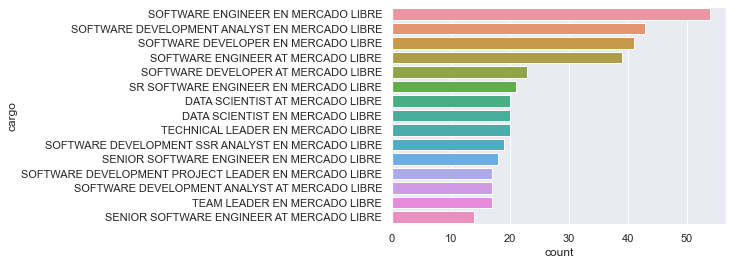

In [9]:
sns.barplot(y="cargo", x="count", data=result.reset_index().head(15))

## Cientista

In [10]:
result = df.query("fl_mercadolibre == 1 and (fl_cientista == 1 or fl_scientist == 1 or fl_machine_learning == 1 or fl_science == 1)").groupby(["cargo"])[["count"]].sum().sort_values(["count"], ascending=False)

<AxesSubplot:xlabel='count', ylabel='cargo'>

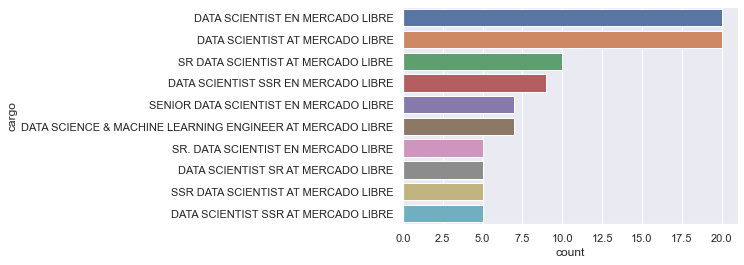

In [11]:
sns.barplot(y="cargo", x="count", data=result.reset_index().head(10))

In [12]:
result["count"].sum()

274

10 cientistas (mas tem que limpar esse numero manualmente)

In [13]:
result = df.query("fl_mercadolibre == 1 and (fl_cientista == 1 or fl_scientist == 1 or fl_machine_learning == 1 or fl_science == 1)").groupby(["localizacao"])[["count"]].sum().sort_values(["count"], ascending=False)

<AxesSubplot:xlabel='count', ylabel='localizacao'>

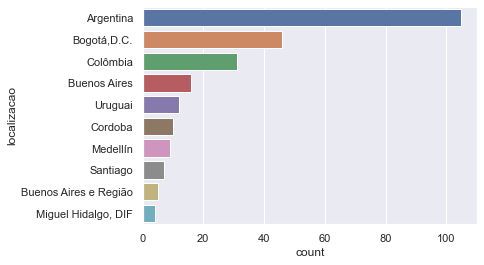

In [14]:
sns.barplot(y="localizacao", x="count", data=result.reset_index().head(10))

## Gerente de cientista

In [15]:
result = df.query("fl_mercadolibre == 1 and (fl_manager == 1 or fl_gerente == 1) and (fl_cientista == 1 or fl_scientist == 1 or fl_machine_learning or fl_science)").groupby(["cargo"])[["count"]].sum().sort_values(["count"], ascending=False)

In [16]:
sns.barplot(y="cargo", x="count", data=result.reset_index().head(10))

<AxesSubplot:xlabel='count', ylabel='cargo'>

10 gerentes de ciencia de dados

## Engenheiro de dados

In [17]:
result = df.query("fl_mercadolibre == 1 and ( (fl_engenheiro == 1 and fl_dados == 1) or (fl_engineer == 1 and fl_data == 1) or (fl_ingeniero == 1 and fl_datos == 1) )").groupby(["cargo"])[["count"]].sum().sort_values(["count"], ascending=False)

<AxesSubplot:xlabel='count', ylabel='cargo'>

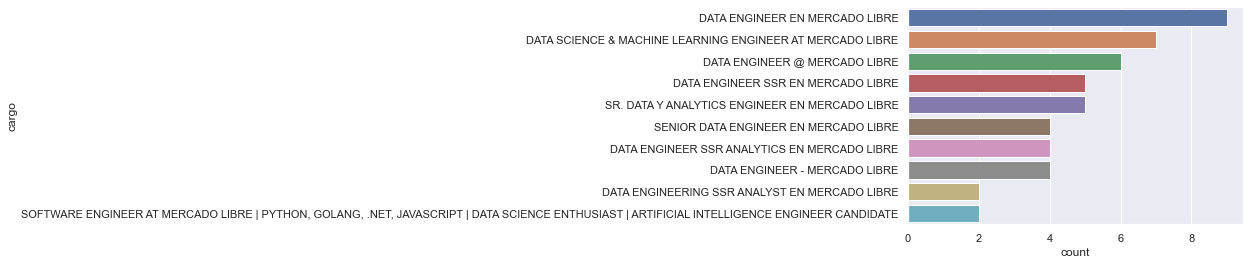

In [18]:
sns.barplot(y="cargo", x="count", data=result.reset_index().head(10))

In [19]:
result["count"].sum()

91

91 engenheiro de dados